In [1]:
import logging
from AEMET import AEMETClient

app_logger = logging.getLogger("myproject.locality")
app_logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s %(name)s %(levelname)s: %(message)s")
handler.setFormatter(formatter)
app_logger.addHandler(handler)

aemet = AEMETClient(app_logger)
localities = aemet.get_localities()

2025-10-21 19:21:46,596 myproject.locality DEBUG: LocalityGraph created with 8122 nodes
2025-10-21 19:21:46,600 myproject.locality DEBUG: Building graph with BallTree (sklearn) with max_km=10.00
2025-10-21 19:21:47,985 myproject.locality INFO: Graph built: 8122 nodes, 32029 edges


Isolated nodes: ['id27001', 'id10004', 'id04003', 'id36020', 'id03002', 'id02003', 'id06006', 'id11001', 'id23003', 'id13008', 'id35020', 'id10013', 'id10011', 'id23004', 'id11003', 'id10018', 'id33001', 'id33002', 'id41009', 'id02009', 'id29011', 'id21006', 'id02010', 'id13017', 'id13903', 'id21008', 'id02011', 'id06015', 'id25039', 'id02015', 'id32011', 'id29023', 'id11901', 'id02017', 'id02019', 'id13024', 'id30012', 'id27008', 'id06023', 'id21015', 'id41020', 'id33008', 'id24029', 'id21016', 'id30013', 'id21017', 'id22072', 'id41022', 'id24036', 'id33011', 'id15018', 'id04032', 'id14016', 'id41024', 'id06033', 'id50077', 'id13033', 'id11013', 'id41031', 'id18046', 'id02025', 'id21023', 'id51001', 'id32029', 'id06042', 'id02029', 'id04037', 'id07015', 'id06037', 'id11014', 'id14020', 'id41033', 'id41035', 'id41036', 'id46099', 'id13036', 'id27015', 'id15032', 'id14021', 'id18056', 'id13039', 'id07026', 'id50095', 'id02030', 'id21031', 'id14026', 'id29051', 'id07022', 'id22109', 'id2

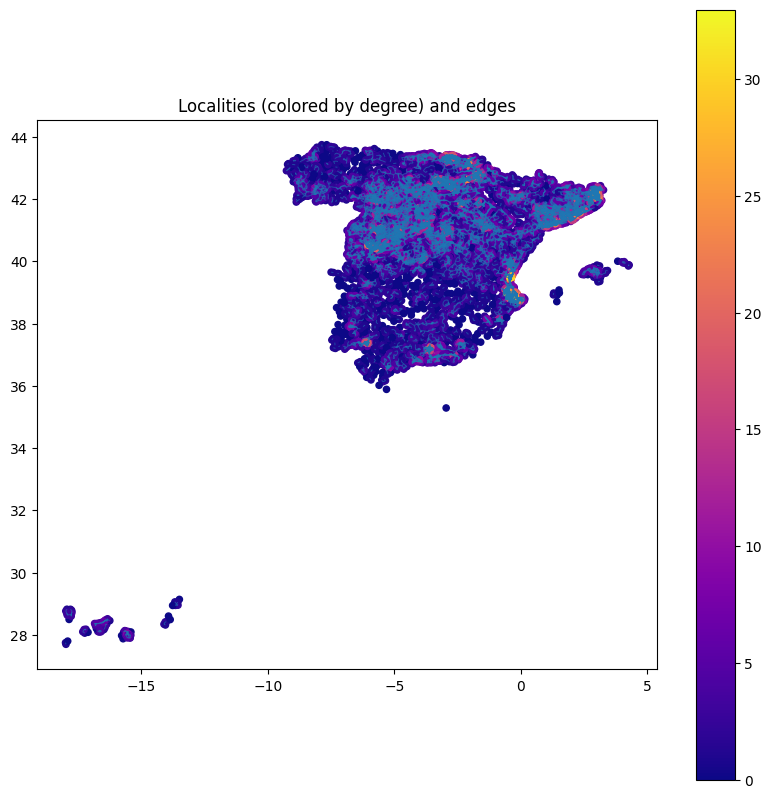

In [4]:
from LocationGraph import LocationGraph

# localities: list of dicts (one example per locality)
lg = LocationGraph.from_list(localities, app_logger)
# build graph with 10 km threshold
lg.build_graph(max_km=10.0)

# quick QC
print("Isolated nodes:", lg.isolated_nodes())
print("Degree stats:", lg.degree_stats())

# static plot (matplotlib)
lg.geopandas_qc_plot()

# interactive map (folium)
#m = lg.folium_map(start_zoom=6)
#m.save("localities_graph.html")


In [5]:
stations = aemet.get_stations()

2025-10-21 19:22:22,203 myproject.locality DEBUG: LocalityGraph created with 947 nodes
2025-10-21 19:22:22,204 myproject.locality DEBUG: Building graph with BallTree (sklearn) with max_km=50.00
2025-10-21 19:22:22,388 myproject.locality INFO: Graph built: 947 nodes, 6410 edges


Isolated nodes: ['657', '710']
Degree stats: {'min': 0, 'max': 42, 'mean': 13.537486800422386, 'median': 11.0}


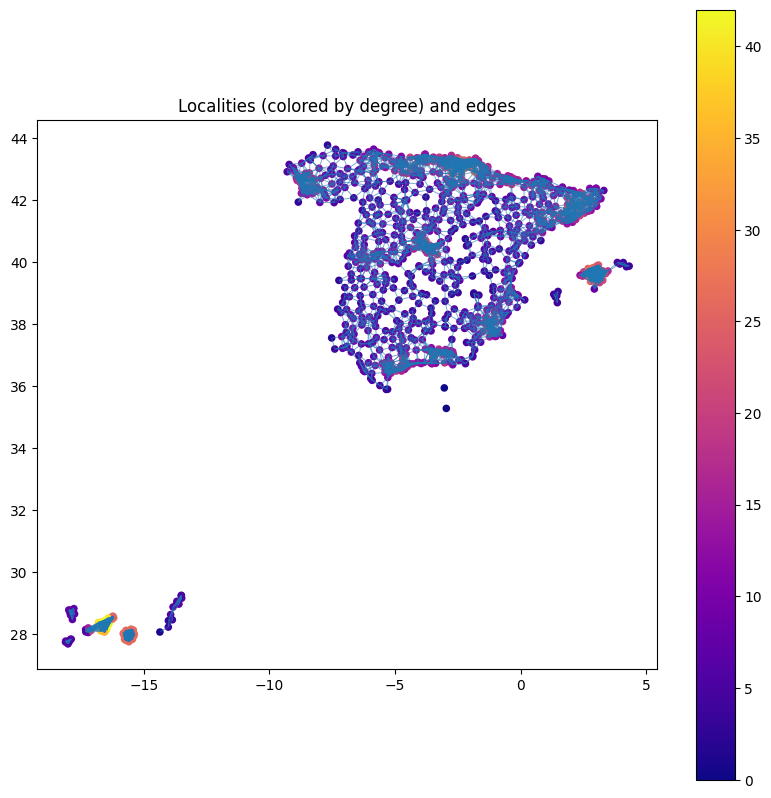

In [6]:
# localities: list of dicts you provided (one example per locality)
sg = LocationGraph.from_list(stations, app_logger)
# build graph with 10 km threshold (uses BallTree if sklearn installed)
sg.build_graph(max_km=50)

# quick QC
print("Isolated nodes:", sg.isolated_nodes())
print("Degree stats:", sg.degree_stats())

# static plot (matplotlib)
sg.geopandas_qc_plot()

# interactive map (folium)
#m = lg.folium_map(start_zoom=6)
#m.save("localities_graph.html")


In [7]:
stations[0]

{'latitud': '394924N',
 'provincia': 'ILLES BALEARS',
 'altitud': '490',
 'indicativo': 'B013X',
 'nombre': 'ESCORCA, LLUC',
 'indsinop': '08304',
 'longitud': '025309E'}

In [19]:
days_for_all_stations = 15
days_yearly = 365.25
num_petitions_year = days_yearly / days_for_all_stations
print(f"Number of petitions per year for all stations: {num_petitions_year}")
num_years = 2025-1920
print(f"Total petitions for {num_years} years: {num_years * num_petitions_year}")

Number of petitions per year for all stations: 24.35
Total petitions for 105 years: 2556.75
